#### Importing Libaries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")



<ipython-input-99-315e7ce36920>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## Linear Regression with Single Variable

#### Step 1: Data Importing and Initial Analysis

In [100]:

# Data Generate X,Y
def generateDataset(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + 5*noise
    return X,y


X,y = generateDataset(100)
print(X.shape,y.shape)


(100,) (100,)


#### Step 2: Visualizing the Data

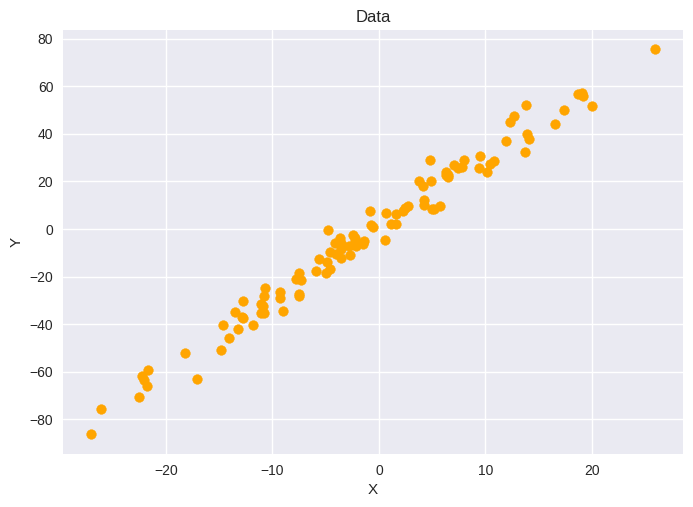

In [101]:

def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

#### Step 3: Pre-processing the Data

In [102]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X


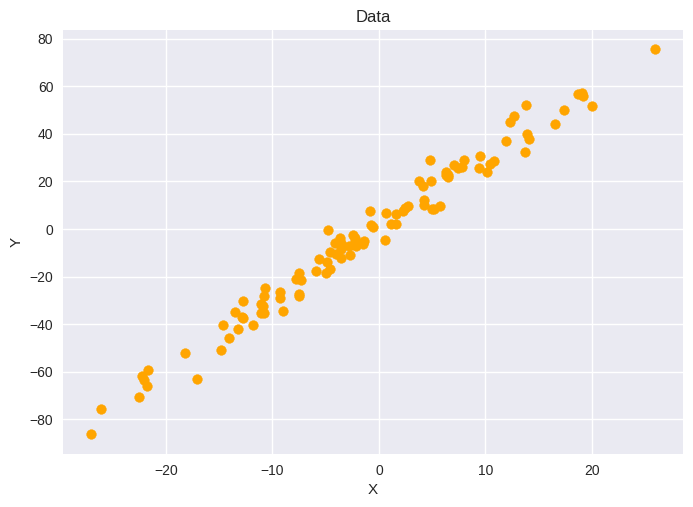

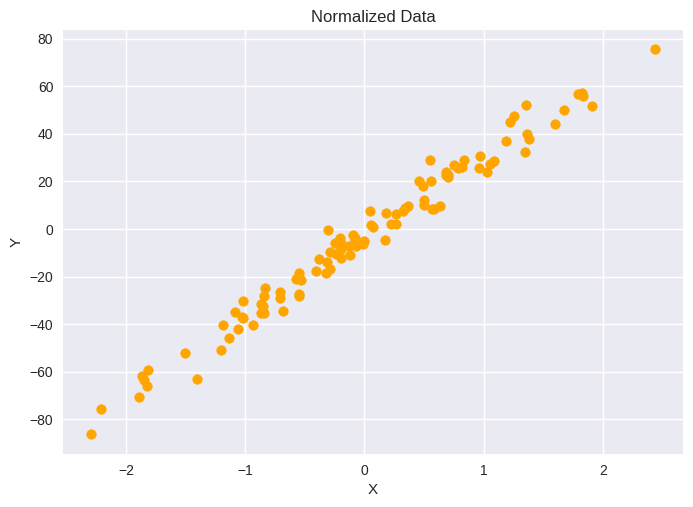

In [103]:

plotData(X,y)
X = normaliseData(X)
plotData(X,y, title='Normalized Data')


#### Step 4: Preparing the Data for training the Model(Train-Test-Split)

In [104]:
def trainTestSplit(X,y,split=0.8):
    m = X.shape[0]
    data = np.zeros((m,2))

    data[:,0] = X
    data[:,1] = y

    np.random.shuffle(data)

    split = int(m*split)

    XT = data[:split,0]
    yT = data[:split,1]

    Xt = data[split: ,0]
    yt = data[split: ,1]

    return XT,yT,Xt,yt


In [105]:

XT,yT,Xt,yt = trainTestSplit(X,y)


print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


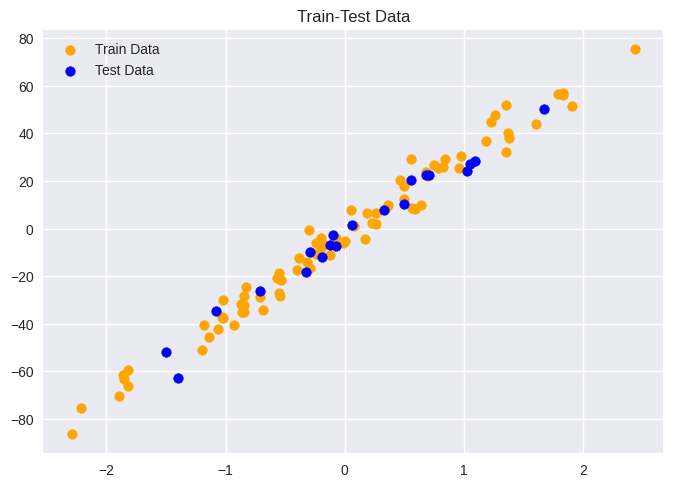

In [106]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='blue',label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

#### Step 5: Building the Model

In [107]:
# Modelling
def hypothesis(X,theta):
    return theta[0] + theta[1]*X

def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2

    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp)*X[i]

    return grad/m



#### Step 6: Training the Model

In [108]:
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0], theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]


    return theta, theta_list, error_list

In [109]:
theta, theta_list, error_list = train(XT,yT)


In [110]:
theta


array([-3.13694877, 33.44622381])

#### Step 7: Predicting the Test Data



In [111]:

def predict(X,theta):
    return hypothesis(X,theta)


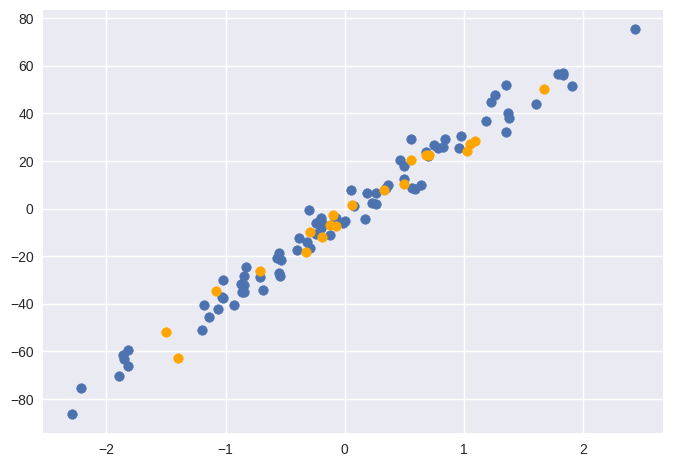

In [112]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

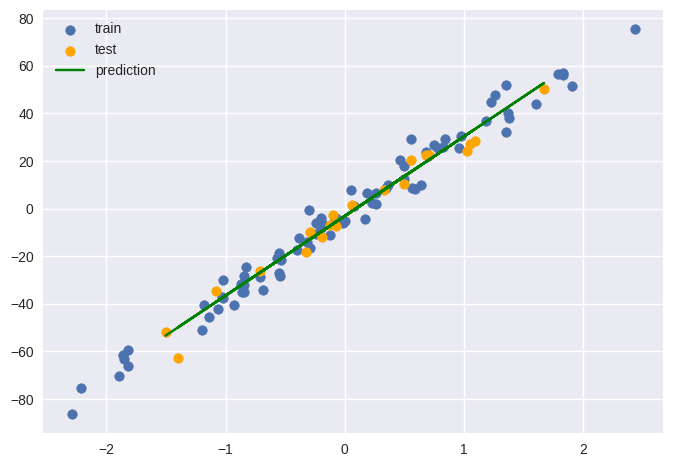

In [113]:
yp = predict(Xt,theta)

plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()


#### Step 8: Evaluating the Model

In [114]:
# R2 score

def r2Score(y, yp):
    u = ((y - yp)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

r2Score(yt,yp)

0.9739764152799827

#### Annexure

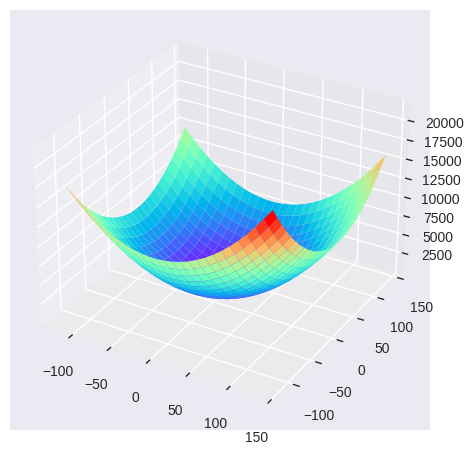

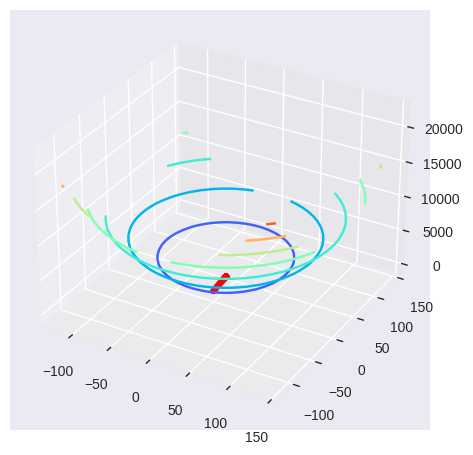

In [115]:
# Visualizing the training process

T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)


for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y - yp)**2)/2

theta_list = np.array(theta_list)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(211, projection='3d')
ax.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(212, projection='3d')
ax.contour(T0, T1, J, cmap='rainbow')
ax.scatter(theta_list[:,0], theta_list[:,1], color='red')
plt.show()

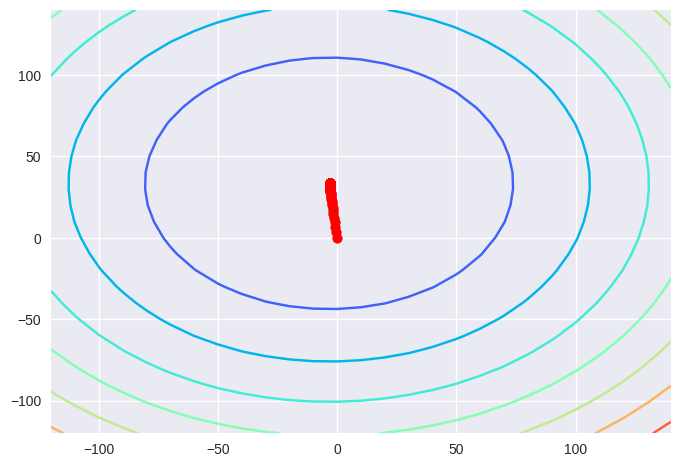

In [116]:
# 2D contour plot (Top View)

plt.contour(T0, T1, J, cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1], color='red')
plt.legend()
plt.show()

## Linear Regression with multiple variables

In [117]:
from sklearn.datasets import make_regression

In [118]:
# Data generation

X, y = make_regression(n_samples=500, n_features=10, noise=10, n_informative=5, random_state=0)
print(X.shape, y.shape)

(500, 10) (500,)


In [119]:
import pandas as pd

df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [120]:
def normalize(X):
    return (X - X.mean(axis=0))/X.std(axis=0)

df = normalize(df)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.763065,1.578026,0.093714,0.341204,0.103098,0.744459,0.421314,-0.460629,-0.710174,-0.760998
1,-1.611349,0.709210,-0.277262,-0.301525,-0.692603,-0.045650,1.115745,0.265705,-0.165882,0.713987
2,0.125810,-0.058649,1.029213,0.559175,-2.655725,1.006987,-2.098529,-0.565805,0.213286,0.175091
3,-1.536012,-0.716457,0.634389,-0.351239,-2.292793,-0.854145,1.653841,-0.263498,0.068083,0.628787
4,-0.072137,-2.153587,0.532936,1.595485,1.330593,-0.658326,1.093260,0.814725,0.204222,0.871969


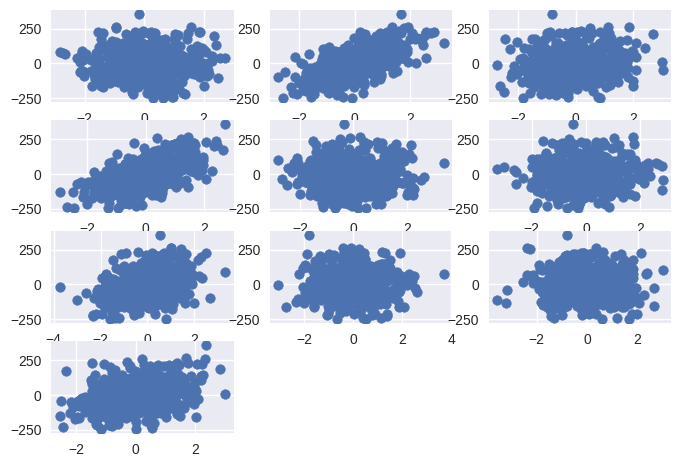

In [121]:
# Visualizing the generated data

for f in range(0, 10):
    plt.subplot(4, 3, f+1)
    plt.scatter(df[f], y)

plt.show()

In [122]:
# Train-Test-Split

from sklearn.model_selection import train_test_split

XT, Xt, yT, yt = train_test_split(X, y, test_size=0.2, random_state=0)
XT.shape, Xt.shape, yT.shape, yt.shape

((400, 10), (100, 10), (400,), (100,))

In [123]:
def preprocess(X, n_features):
    if X.shape[1]==n_features:
        m = X.shape[0]
        ones = np.ones((m, 1))
        X = np.hstack((ones, X))
    return X

In [124]:
XT = preprocess(XT, 10)
Xt = preprocess(Xt, 10)
XT.shape, Xt.shape

((400, 11), (100, 11))

In [125]:
pd.DataFrame(XT).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.042498,-1.345773,-1.427675,0.352934,0.490995,0.820502,-0.294159,-1.178042,-0.341079,-0.956312
1,1.0,0.938747,0.087531,-1.031482,-1.429991,-1.048170,0.607112,-0.061638,-0.860262,0.328301,-1.432735
2,1.0,0.676433,-0.635846,-0.769916,0.539249,-0.208299,0.576591,-0.674333,0.396007,-1.093062,0.031831
3,1.0,-0.875682,0.781167,-1.852343,-0.713327,-0.576455,0.613981,-1.762229,-0.045614,0.371956,0.830517
4,1.0,-0.171546,0.523277,-1.292857,0.267051,0.823504,0.771791,-0.039283,2.163236,1.336528,-1.168093


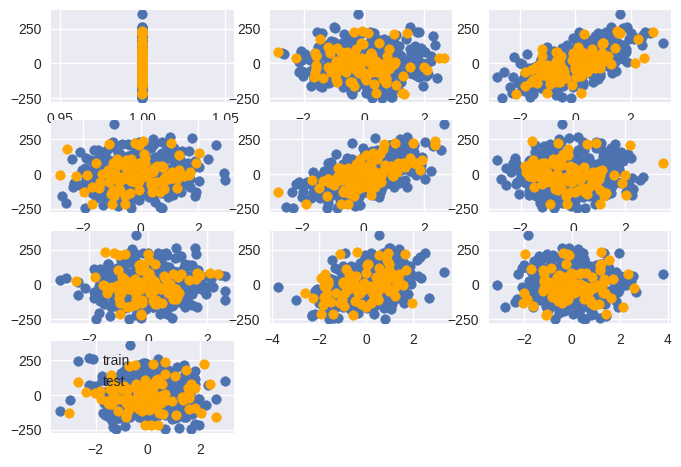

In [136]:

for f in range(0, 10):
    plt.subplot(4, 3, f+1)
    plt.scatter(XT[:,f],yT,label="train")
    plt.scatter(Xt[:,f],yt,color='orange',label="test")
plt.legend()
plt.show()

In [126]:
def hypothesis(X, theta):
    return np.dot(X, theta)

In [127]:
def loss(X, y, theta):
    yp = hypothesis(X, theta)
    return np.mean((yp - y)**2)

In [128]:
def grad(X, y, theta):
    yp = hypothesis(X, theta)
    grad = np.dot(X.T, (yp - y))
    m = X.shape[0]
    return grad/m

In [129]:
def train(X, y, learning_rate=0.1, max_iters=100):
    n = X.shape[1]
    theta = np.random.randn(n)
    error_list = []
    theta_list = []

    for i in range(max_iters):
        grd = grad(X, y, theta)
        error_list.append(loss(X, y, theta))
        theta_list.append(theta)
        theta = theta - learning_rate*grd
    plt.plot(error_list)
    plt.show()
    return theta, theta_list, error_list


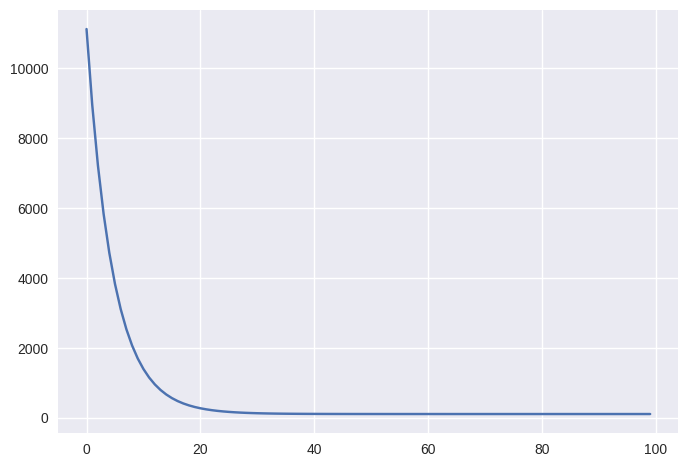

[-0.15110745 -0.37027012 60.99193152 10.15818188 67.02542185 -0.082619
 -0.35646199 41.18493058 -0.082893    0.57436191 24.71221742]


In [130]:
theta, theta_list, error_list = train(XT, yT)
print(theta)

#### Predicting the Test Data

In [131]:
yp = hypothesis(Xt, theta)


In [132]:
r2Score(yt, yp)

0.9890559753707636

#### Linear Regression with Sk-learn

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
model = LinearRegression()
model.fit(XT, yT)

LinearRegression()

In [140]:
yp = model.predict(Xt)
yp.shape

(100,)

In [143]:
model.score(Xt, yt)

0.9890557781741673

In [144]:
model.intercept_

-0.15066502418376349

In [145]:
model.coef_

array([ 0.        , -0.37260586, 60.99645496, 10.16138185, 67.02921948,
       -0.08628304, -0.36303988, 41.18992696, -0.08042623,  0.57321881,
       24.70702268])